In [ ]:
import google.generativeai as genai
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API key from environment variable
API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

In [18]:
for model_info in genai.list_tuned_models():
    print(model_info.name)

tunedModels/mira-x3tf6an2hchl


In [ ]:
pri

In [35]:
import pandas as pd
training_data = pd.read_csv('mira_training_data.csv', delimiter=',')


In [36]:
training_data_list = training_data.to_dict(orient='records')

In [37]:
training_data_list

[{'text_input': 'What comes after 4?', 'output': '5'},
 {'text_input': '2 + 2', 'output': '4'},
 {'text_input': 'Hi MIRA!', 'output': 'Hello! How can I assist you today?'},
 {'text_input': 'Thanks!', 'output': "You're welcome!"},
 {'text_input': 'Goodbye', 'output': 'Goodbye! See you next time.'},
 {'text_input': 'Tell me a joke!',
  'output': 'Why did the scarecrow win an award? Because he was outstanding in his field!'},
 {'text_input': 'Can you cheer me up?',
  'output': 'What do you call fake spaghetti? An impasta!'},
 {'text_input': 'The image shows a dog chasing a ball.',
  'output': 'It seems like the dog is playing. Do you need help identifying the breed?'},
 {'text_input': 'There’s a fruit basket with apples and oranges.',
  'output': 'It’s a healthy choice! Want a fun fruit fact?'},
 {'text_input': 'Play some relaxing music.',
  'output': 'Playing relaxing music.'},
 {'text_input': 'What is the capital of Japan?', 'output': 'Tokyo.'},
 {'text_input': 'Remind me to attend the 

100%|██████████| 105/105 [10:12<00:00,  5.83s/it]


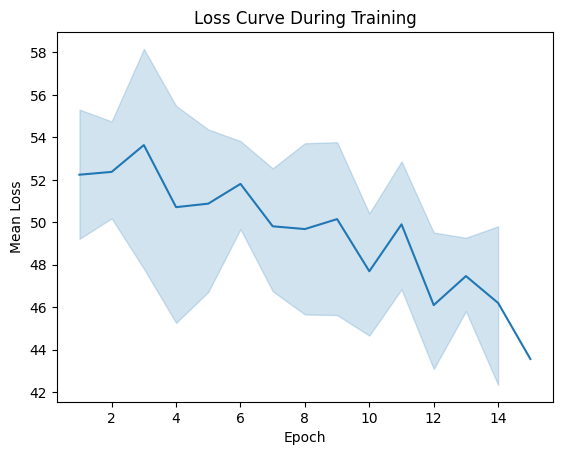

In [38]:
import time
import seaborn as sns
import matplotlib.pyplot as plt


base_model = "models/gemini-1.5-flash-001-tuning"

operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    display_name="mira",
    source_model=base_model,
    epoch_count=15,
    batch_size=16,
    learning_rate=1e-5,
    training_data=training_data,
)

for status in operation.wait_bar():
    time.sleep(10)

result = operation.result()



# You can plot the loss curve with:
snapshots = pd.DataFrame(result.tuning_task.snapshots)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')
plt.title('Loss Curve During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.show()

In [47]:
model = genai.GenerativeModel(model_name="tunedModels/mira-x3tf6an2hchl")
result = model.generate_content("How to solve this problem ?. Image: a text write 3x+4 = 6")
print(result.text)  # "IV"

1. Isolate x by subtracting 4 from both sides.2. Divide both sides by 3 to get x = 2/3.
